In [18]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
import numpy as np
import os,cv2

def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h,w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

In [19]:
dir_name= "faces/"
y=[];x=[];target_names=[]
person_id=0;h=w=300
n_samples=0
class_names=[]
for person_name in os.listdir(dir_name):
    dir_path = dir_name+person_name+"/"
    class_names.append(person_name)
    for image_name in os.listdir(dir_path):
        image_path = dir_path+image_name
        img = cv2.imread(image_path)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        resized_image= cv2.resize(gray,(h,w))
        v = resized_image.flatten()
        x.append(v)
        n_samples =n_samples+1
        y.append(person_id)
        target_names.append(person_name)
    person_id=person_id+1
y=np.array(y)
x=np.array(x)
target_names =np.array(target_names)
n_features = x.shape[1]
print(y.shape,x.shape,target_names.shape)
print("Number of samples:",n_samples)

n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

(450,) (450, 90000) (450,)
Number of samples: 450
Total dataset size:
n_samples: 450
n_features: 90000
n_classes: 450


Extracting the top 150 eigenfaces from 337 faces


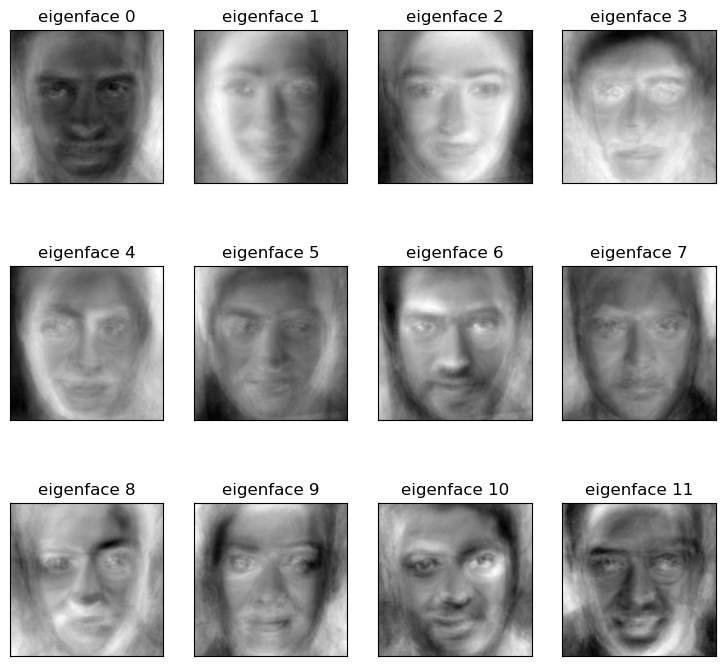

Projecting the input data on the eigenfaces orthonormal basis
(337, 150) (113, 150)
Project done...


In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

n_components = 150

print("Extracting the top %d eigenfaces from %d faces"% (n_components, x_train.shape[0]))

pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(x_train)

eigenfaces = pca.components_.reshape((n_components, h, w))

eigenfaces_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenfaces_titles, h, w)

plt.show()

print("Projecting the input data on the eigenfaces orthonormal basis")
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)
print(x_train_pca.shape,x_test_pca.shape)

lda = LinearDiscriminantAnalysis()
lda.fit(x_train_pca, y_train)

x_train_lda = lda.transform(x_train_pca)
x_test_lda = lda.transform(x_test_pca)
print("Project done...")

In [21]:
clf = MLPClassifier(random_state=1, hidden_layer_sizes=(10,10), max_iter=1000, verbose=True).fit(x_train_lda, y_train)
print("Model weights:")
model_info = [coef.shape for coef in clf.coefs_]
print(model_info)

Iteration 1, loss = 2.85230018
Iteration 2, loss = 2.80553586
Iteration 3, loss = 2.76000028
Iteration 4, loss = 2.71558765
Iteration 5, loss = 2.67206403
Iteration 6, loss = 2.63067684
Iteration 7, loss = 2.58848409
Iteration 8, loss = 2.54791547
Iteration 9, loss = 2.50858417
Iteration 10, loss = 2.46893415
Iteration 11, loss = 2.43065402
Iteration 12, loss = 2.39424252
Iteration 13, loss = 2.35863081
Iteration 14, loss = 2.32434728
Iteration 15, loss = 2.28880658
Iteration 16, loss = 2.25604262
Iteration 17, loss = 2.22355199
Iteration 18, loss = 2.19203303
Iteration 19, loss = 2.16152020
Iteration 20, loss = 2.13119776
Iteration 21, loss = 2.10260733
Iteration 22, loss = 2.07382531
Iteration 23, loss = 2.04611031
Iteration 24, loss = 2.01870123
Iteration 25, loss = 1.99119173
Iteration 26, loss = 1.96475167
Iteration 27, loss = 1.93787289
Iteration 28, loss = 1.91211066
Iteration 29, loss = 1.88585274
Iteration 30, loss = 1.86066645
Iteration 31, loss = 1.83511353
Iteration 32, los

Iteration 264, loss = 0.10337260
Iteration 265, loss = 0.10270380
Iteration 266, loss = 0.10202846
Iteration 267, loss = 0.10139528
Iteration 268, loss = 0.10073524
Iteration 269, loss = 0.10008920
Iteration 270, loss = 0.09948470
Iteration 271, loss = 0.09884042
Iteration 272, loss = 0.09822981
Iteration 273, loss = 0.09761369
Iteration 274, loss = 0.09701594
Iteration 275, loss = 0.09648351
Iteration 276, loss = 0.09586112
Iteration 277, loss = 0.09528290
Iteration 278, loss = 0.09471197
Iteration 279, loss = 0.09415879
Iteration 280, loss = 0.09361006
Iteration 281, loss = 0.09306892
Iteration 282, loss = 0.09253147
Iteration 283, loss = 0.09199899
Iteration 284, loss = 0.09147451
Iteration 285, loss = 0.09095141
Iteration 286, loss = 0.09042837
Iteration 287, loss = 0.08994072
Iteration 288, loss = 0.08939777
Iteration 289, loss = 0.08893291
Iteration 290, loss = 0.08844620
Iteration 291, loss = 0.08794784
Iteration 292, loss = 0.08747363
Iteration 293, loss = 0.08700532
Iteration 

Iteration 525, loss = 0.03391621
Iteration 526, loss = 0.03380709
Iteration 527, loss = 0.03370338
Iteration 528, loss = 0.03362294
Iteration 529, loss = 0.03350354
Iteration 530, loss = 0.03342056
Iteration 531, loss = 0.03331125
Iteration 532, loss = 0.03322879
Iteration 533, loss = 0.03311990
Iteration 534, loss = 0.03302773
Iteration 535, loss = 0.03292575
Iteration 536, loss = 0.03283699
Iteration 537, loss = 0.03274554
Iteration 538, loss = 0.03264976
Iteration 539, loss = 0.03257278
Iteration 540, loss = 0.03246534
Iteration 541, loss = 0.03239021
Iteration 542, loss = 0.03226653
Iteration 543, loss = 0.03218042
Iteration 544, loss = 0.03213552
Iteration 545, loss = 0.03200265
Iteration 546, loss = 0.03191076
Iteration 547, loss = 0.03183138
Iteration 548, loss = 0.03173212
Iteration 549, loss = 0.03164700
Iteration 550, loss = 0.03155207
Iteration 551, loss = 0.03144994
Iteration 552, loss = 0.03136146
Iteration 553, loss = 0.03128601
Iteration 554, loss = 0.03119746
Iteration 

Accuracy 77.87610619469027


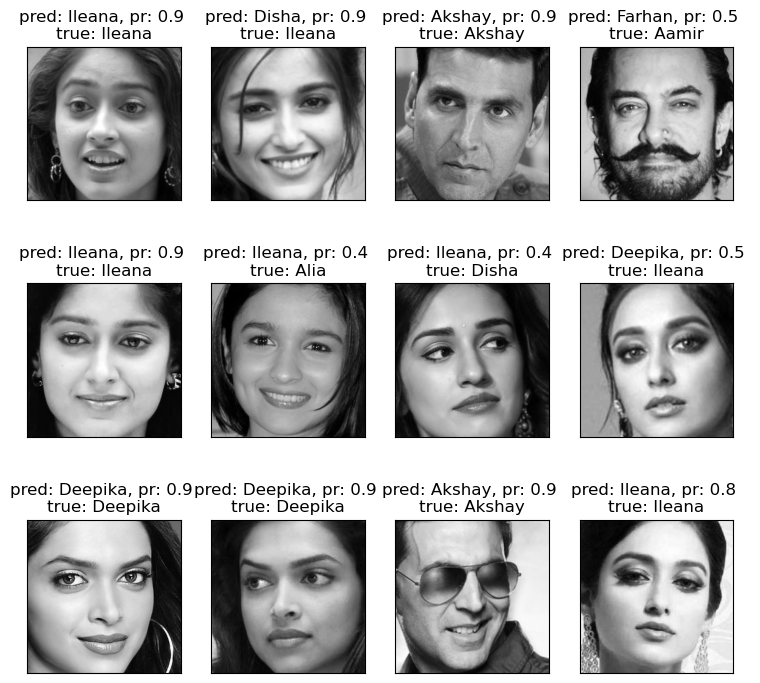

In [22]:
y_pred=[];y_prob=[]
for test_face in x_test_lda:
    prob = clf.predict_proba([test_face])[0]
    class_id = np.where(prob == np.max(prob))[0][0]
    y_pred.append(class_id)
    y_prob.append(np.max(prob))
    
y_pred = np.array(y_pred)

prediction_titles=[]
true_positive = 0
for i in range(y_pred.shape[0]):
    true_name = class_names[y_test[i]]
    pred_name = class_names[y_pred[i]]
    result = 'pred: %s, pr: %s \ntrue: %s' % (pred_name, str(y_prob[i])[0:3], true_name)
    prediction_titles.append(result)
    if true_name==pred_name:
       true_positive =true_positive+1
    
print("Accuracy",true_positive*100/y_pred.shape[0])

plot_gallery(x_test, prediction_titles, h, w)
plt.show()